In [1]:
import os
import sys
sys.path.append('../')

import time
import pickle
import numpy as np
import pandas as pd
from argparse import Namespace

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

from dps import sample, darkphoton

### Initialization

##### without momentum

In [2]:
M = 1.3
A = darkphoton.DarkPhoton(M)
print(A.zmin, A.zmax)
print(A.abskTmax)

0.0010756199129305232 1.00117123722548
13.681973070612909


In [3]:
A.set_kinematics()

DarkPhotonError: Momentum is required.

##### Add momentum

In [4]:
M = 1.3
z = 0.3
kT = 1.5

A = darkphoton.DarkPhoton(M, z, kT)
A.set_kinematics()
A.set_indomain()

print(A.xA, A.Ek)
print(A.indomain)

0.19626221306938427 120.01641554387467
True


In [5]:
M = 1.3
z = np.array([0.2, 0.5, 0.6, -0.2, 1.2, 0.6])
kT = np.array([1.5, -0.2, 17, 2.3, 2, 0.7])

A = darkphoton.DarkPhoton(M, z, kT)
A.set_kinematics()
A.set_indomain()

print(A.xA, A.Ek)
print(A.indomain)

[1.30852660e-01 4.93611754e-01 4.57527237e-02 2.67937327e-05
 6.53223256e-01 5.27668242e-01] [ 80.02462121 200.00432495 240.60484201  80.04361311 480.00592705
 240.00454162]
[ True  True False False False  True]


### Boundaries

In [6]:
M = 1.3
z = np.array([0.2, 0.5, 0.6, -0.2, 1.2, 0.6])
kT = np.array([1.5, -0.2, 17, 2.3, 2, 0.7])

A = darkphoton.DarkPhoton(M, z, kT)
A.set_kinematics()
A.set_indomain()

kT = np.array([2.3, 4.5])
zmin, zmax = A.get_zmin_and_zmax(kT)
print(zmin)
print(zmax)

[2.3 4.5]
(array([0.0081917 , 0.02889589]), array([0.99405515, 0.97335097]))


In [9]:
M = 1.3
z = np.array([0.2, 0.5, 0.6, -0.2, 1.2, 0.6])
kT = np.array([1.5, -0.2, 17, 2.3, 2, 0.7])

A = darkphoton.DarkPhoton(M, z, kT)
A.set_kinematics()
A.set_indomain()

z = 0.23
kTmax = A.kTmax(z)
print(kTmax)

11.496314545526536


### Samples

In [10]:
M = 2.6
A = darkphoton.DarkPhoton(M)

In [11]:
z = np.linspace(A.zmin, A.zmax, 10000)
kTmax = A.kTmax(z)

##### regular

In [12]:
Nz = 100
NkT = 200
sample.sample(A, "regular", (Nz, NkT), mesh="gaussian", set_coord=True, quiet=True)

/home/jonas/local/py3/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


<IPython.core.display.Javascript object>


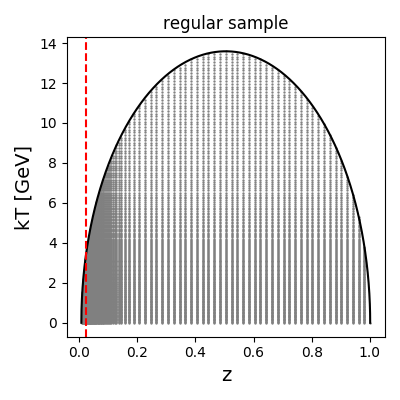

In [13]:
%matplotlib notebook

fig, ax = plt.subplots(figsize=(4, 4))

ax.plot(z, kTmax, 'k')
ax.scatter(A.z, A.kT, s=0.5, color='gray')
ax.axvline(A.z0, 0, A.abskTmax, Linestyle='--', color='r')

ax.set_xlabel("z", fontsize=14)
ax.set_ylabel("kT [GeV]", fontsize=14)

plt.title("regular sample")
plt.tight_layout()
plt.show()

##### random

In [16]:
sample_size = 10000
sample.sample(A, "random", sample_size, seed=0, set_coord=True, quiet=True)

<IPython.core.display.Javascript object>


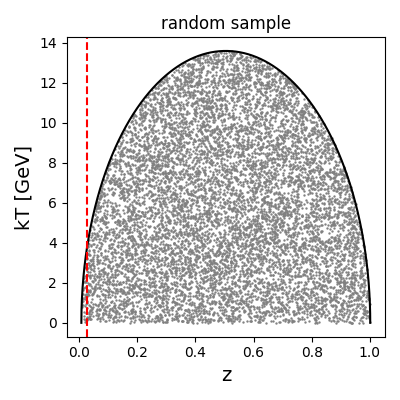

In [17]:
%matplotlib notebook

fig, ax = plt.subplots(figsize=(4, 4))

ax.plot(z, kTmax, 'k')
ax.scatter(A.z, A.kT, s=0.5, color='gray')

ax.set_xlabel("z", fontsize=14)
ax.set_ylabel("kT [GeV]", fontsize=14)
ax.axvline(A.z0, 0, A.abskTmax, Linestyle='--', color='r')


plt.title("random sample")
plt.tight_layout()
plt.show()

##### transverse cut

In [17]:
sample_size = 200
sample.sample(A, "cut", sample_size, mesh="constant", z=0.7, set_coord=True, quiet=True)

<IPython.core.display.Javascript object>


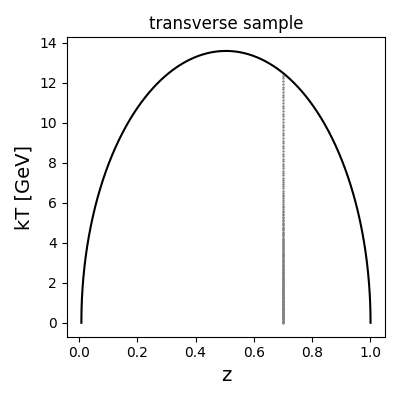

In [14]:
%matplotlib notebook

fig, ax = plt.subplots(figsize=(4, 4))

ax.plot(z, kTmax, 'k')
ax.scatter(A.z, A.kT, s=0.5, color='gray')

ax.set_xlabel("z", fontsize=14)
ax.set_ylabel("kT [GeV]", fontsize=14)

plt.title("transverse sample")
plt.tight_layout()
plt.show()

##### longitudinal sample

In [20]:
sample_size = 200
sample.sample(A, "cut", sample_size, mesh="gaussian", kT=1.7, set_coord=True, quiet=True)

<IPython.core.display.Javascript object>


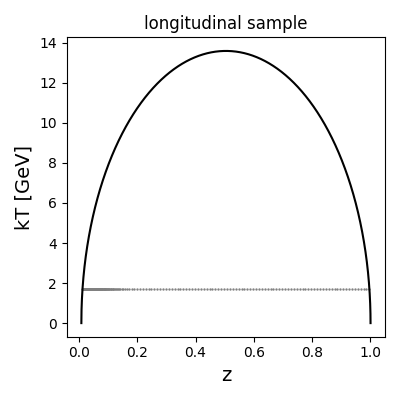

In [21]:
%matplotlib notebook

fig, ax = plt.subplots(figsize=(4, 4))

ax.plot(z, kTmax, 'k')
ax.scatter(A.z, A.kT, s=0.5, color='gray')

ax.set_xlabel("z", fontsize=14)
ax.set_ylabel("kT [GeV]", fontsize=14)

plt.title("longitudinal sample")
plt.tight_layout()
plt.show()